# CYBERML: Adversarial ML - Lab session 2

`
Raphaël Bennaïm
ING3 - SCIA
PROMO 2024
`

# Part II: Visualisation

## Imports

In [67]:
from mlsecu.distribution_utils import get_distributions
from mlsecu.statistics_utils import *
from mlsecu.adversarial_ml_exploratory_attacks import *

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

Let's use our distribution utils to generate some datasets.

In [68]:
# first dataset (2 classes)
X, y = get_distributions([[1, 2], [7, 5.5]], 0.35, 100)

# second dataset (3 classes)
X2, y2 = get_distributions([[2, 0], [6, 4], [-2, 4]], 0.8, 150)

Now that we have datasets we need to create an SVM linear classifier.

In [69]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

1. Plot data and the decision boundary for 2 classes

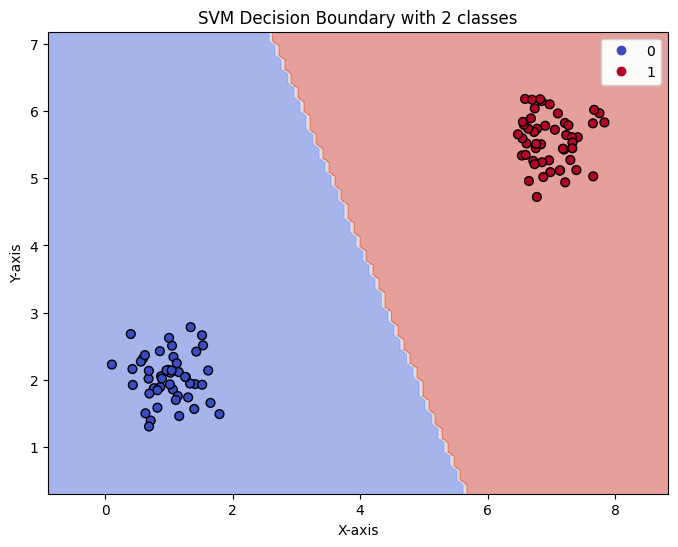

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))

# Decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap='coolwarm',
    alpha=0.5,
    ax=ax,
    response_method="predict"
)

# Plot our data
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=40, edgecolors='k', label='Data Points')

legend = ax.legend(*scatter.legend_elements(), loc="best")
ax.add_artist(legend)


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('SVM Decision Boundary with 2 classes')

plt.show()

2. Plot data and the decision boundary for 3 classes, and identify absolute vs relative prediction zones

Let's now use a LinearSVC classifier for multi-class approach.

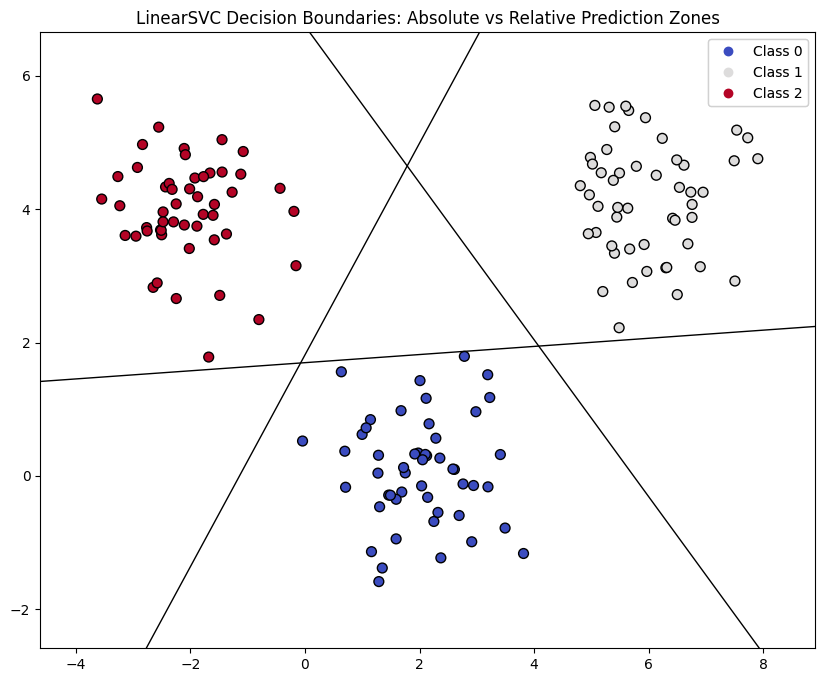

In [71]:
clf2 = LinearSVC(dual=False, multi_class='ovr', random_state=0)
clf2.fit(X2, y2)

n_classes = len(np.unique(y2))

xx, yy = np.meshgrid(np.linspace(X2[:, 0].min() - 1, X2[:, 0].max() + 1, 500),
                     np.linspace(X2[:, 1].min() - 1, X2[:, 1].max() + 1, 500))

Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape[0], xx.shape[1], n_classes)

plt.figure(figsize=(10, 8))
contours = []
for i in range(n_classes):
    contour = plt.contour(xx, yy, Z[:, :, i], levels=[0], colors='k', linestyles='-', linewidths=1)
    contours.append(contour.collections[0])

scatter = plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='coolwarm', edgecolors='k', s=50)

class_labels = ["Class {}".format(c) for c in np.unique(y2)]
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=class_labels, loc="upper right")
plt.gca().add_artist(legend1)

plt.title('LinearSVC Decision Boundaries: Absolute vs Relative Prediction Zones')
plt.show()

3. Plot support vectors (using black cycles), adversarial points (in green) as well as the alteration between original and altered points as green dotted line.

In [72]:
support_vectors = clf.support_vectors_
original_pts, altered_pts, adv_epsilons = get_adversarial_points(clf, support_vectors, fgsm_attack_svm_2c, get_euclidian_dist, epsilon=inf)

Attack failed: max step exceeded
Attack failed: max step exceeded


In [73]:
attack_point, eps = fgsm_attack_svm_2c(clf, support_vectors[0] , get_euclidian_dist, step=0.1, max_step=200)

In [74]:
print ("Attack point: ", attack_point)
print ("Epsilon: ", eps)

Attack point:  [4.08722806 3.81226102]
Epsilon:  2.8116918682421828


Let's now plot the support vectors detected by our classifier.

As well as the adversarial points (in green) and the alteration between original and altered points as green dotted line.

Text(0, 0.5, 'Y-axis')

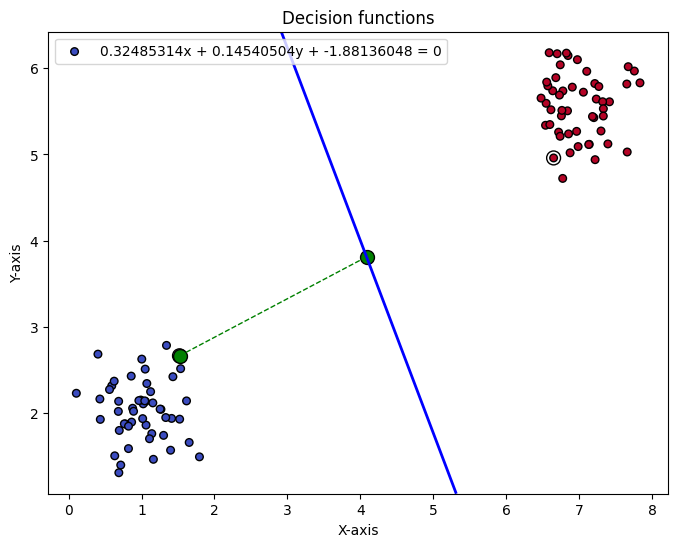

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

ax.scatter(support_vectors[0][0], support_vectors[0][1], s=100,
           linewidth=1, facecolors='g', edgecolors='k')

ax.scatter(attack_point[0], attack_point[1], s=100,
           linewidth=1, facecolors='g', edgecolors='k')

ax.plot([support_vectors[0][0], attack_point[0]], [support_vectors[0][1], attack_point[1]], color='g', linestyle='--', linewidth=1)

coef_x = clf.coef_[0][0]
coef_y = clf.coef_[0][1]
intercept = clf.intercept_[0]

legend = f"{coef_x:.8f}x + {coef_y:.8f}y + {intercept:.8f} = 0"

ax.contour(XX, YY, Z, colors='b', levels=[0], alpha=1,
           linestyles=['-'], linewidths=[2])
ax.legend([legend], loc="upper left")

ax.set_title('Decision functions')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')